# Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime
import glob
import os
import warnings
warnings.filterwarnings('ignore')

plt.style.use("default")
mpl.rcParams['xtick.labelsize']=13
mpl.rcParams['ytick.labelsize']=13
mpl.rcParams['font.sans-serif'] = "Century Gothic"
mpl.rcParams['font.family'] = "Century Gothic"
mpl.rcParams['font.weight'] = 'normal'
def fig_params(ax):
    ax.grid()    
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.spines['top'].set_color('gray')
    ax.tick_params('y', colors='tab:gray')
    ax.tick_params('x', colors='tab:gray')
    for label in ax.get_yticklabels():
        label.set_color('k')
        label.set_size(13)
    for label in ax.get_xticklabels():
        label.set_color('k')
        label.set_size(13)

# Data

In [2]:
def read_data_file_TPAR(frontera, paths, date_ini, date_fin, dispersional_direction):
    """
    Input:
    - frontera: orientación de la frontera/ 'Norte'/'Sur'/'Este'/'Oeste'
    - paths: ruta de los archvivos
    -------------------------------------------------------------------
    Output:
    -  
    """
    custom_date_parser = lambda x: datetime.datetime.strptime(x, "%Y%m%d.%H%M%S")
    dic_ = {}
    for j, path in enumerate(paths):
        if (frontera in path) == True:
            df_data = pd.read_csv(path, sep ='\s+', header=7, usecols=[0,4,6,7], names= ['time', 'Hs', 'Tp', 'Dir'],
                parse_dates=['time'],
                date_parser=custom_date_parser)
            df_data.set_index('time', inplace=True)
            try:
                df_data.loc[df_data['Tp']<=2, 'Tp'] = df_data[df_data['Tp']<=2]['Tp'] +4.5
            except:
                pass

            name_df = path.split('.')[0].split('_')[-1]
            dic_.update({name_df: df_data})
            time_split = df_data[date_ini:date_fin].index
            time_tpar = [time_split[i].strftime("%Y%m%d.%H%M") for i in range( len(time_split))]
            dis_direc = np.ones(len(time_split))*dispersional_direction
            df_tpar = pd.DataFrame({'time':time_tpar, 'Hs':df_data[date_ini:date_fin]['Hs'], 
                                   'Tp':df_data[date_ini:date_fin]['Tp'], 'Dir':df_data[date_ini:date_fin]['Dir'], 
                                   'Direc_disp':dis_direc})

            
            with open (name_df+'_nest_VALIDACION.bnd', "w") as f:
                f.write("TPAR \n")
                np.savetxt(f,df_tpar,fmt =('%s  %7.9f  %8.9f  %9.9f  %5.1f'))            
        else:
            pass
    return dic_

In [47]:
def fig_tepar(dic, frontera, variable, label_dic1 ,coef_ticklbs, label_rotation, date_ini, date_fin, compare_fig:bool, dic2 = None, label_dic2 = None):
    """
    Input:
    - dic : diccionario de la frontera para dibujar
    - frontera: frontera a dibujar 'Norte'/'Sur'/'Este'/'Oeste'
    - variable: variable a plotear 'Hs'/'Tp'/'Dir'
    - coef_ticklbs: coeficiente para ajustar los labels del tiempo
    - label_rotation: angulo de rotación para el eje del tiempo
    - date_ini: fecha incicial de graficación
    - date_fin: fecha final de graficación
    - compare_fig: si compara con otra figura
    - dic2 = diccionario 2 de la frontera a comparar
    -------------------------------------------------------------------
    Output: 
    - figura de la variable especificada
    """
    
    keys_dic = list(dic.keys())
    fig, ax = plt.subplots(figsize = (10,4))

    colors = mpl.cm.coolwarm(np.linspace(0,1,len(keys_dic)))
    for i, key in enumerate(keys_dic):
        df = dic[key][variable][date_ini:date_fin]
        ax.plot(df,label = f'{key} [{label_dic1}]', color = colors[i])
    if compare_fig == True: 
        for i, key in enumerate(list(dic2.keys())):
            df2 = dic2[key][variable][date_ini:date_fin]
            ax.plot(df2, label = f'{key} [{label_dic2}]', color = 'r')
    ax.set_xlabel('Date', size = 14, fontweight = 'bold')
    if variable == 'Hs':
        title =  'Significant wave height at ' + frontera
        units = '[m]'
    elif variable == 'Tp':
        title =  'Peak period at ' + frontera
        units = '[seg]'
    else:
        title = 'Wave direction at ' + frontera
        units = '[deg]'
    ticklabels = df.index[::coef_ticklbs]
    ax.set_ylabel(variable +' '+ units, size = 14, fontweight = 'bold')
    ax.set_title(title,size = 16,fontweight = 'bold')   # Subtítulo de la figura
    ax.set_xticks(ticklabels)
    date_format = mdates.DateFormatter('%y-%m-%d %H')
    ax.xaxis.set_major_formatter(date_format)
    fig_params(ax)
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.001),fancybox=True, shadow=True, ncol=4, fontsize = 12)
    plt.xticks(rotation=label_rotation)
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.2)
    plt.subplots_adjust(hspace=0.2)

In [65]:
# Paths global points
# paths = sorted(glob.glob(r"G:\My Drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\VALIDACION\SWAN_TEST04_VALIDACION\*.out"))
paths = sorted(glob.glob(r"G:\My Drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\VALIDACION\SWAN_TEST02_VALIDACION\*.out"))
date_ini = datetime.datetime(2018,5,1,7) # Parámetro a variar
date_fin = datetime.datetime(2018,5,10,10) # Parámetro a variar

In [66]:
# Paths global points
paths_100m = sorted(glob.glob(r"G:\My Drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\VALIDACION\SWAN_TEST04_VALIDACION\*.out"))
date_ini = datetime.datetime(2018,5,1,7) # Parámetro a variar
date_fin = datetime.datetime(2018,5,10,10) # Parámetro a variar

In [72]:
# Paths global points
paths_50m = sorted(glob.glob(r"G:\My Drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\VALIDACION\SWAN_TEST04_VALIDACION\SWAN_NEST_50m\*.out"))
date_ini = datetime.datetime(2018,5,1,7) # Parámetro a variar
date_fin = datetime.datetime(2018,5,10,10) # Parámetro a variar

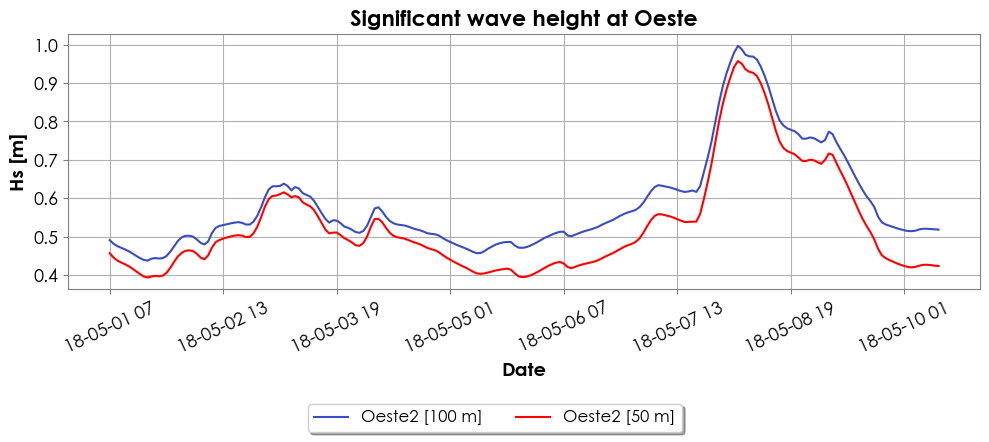

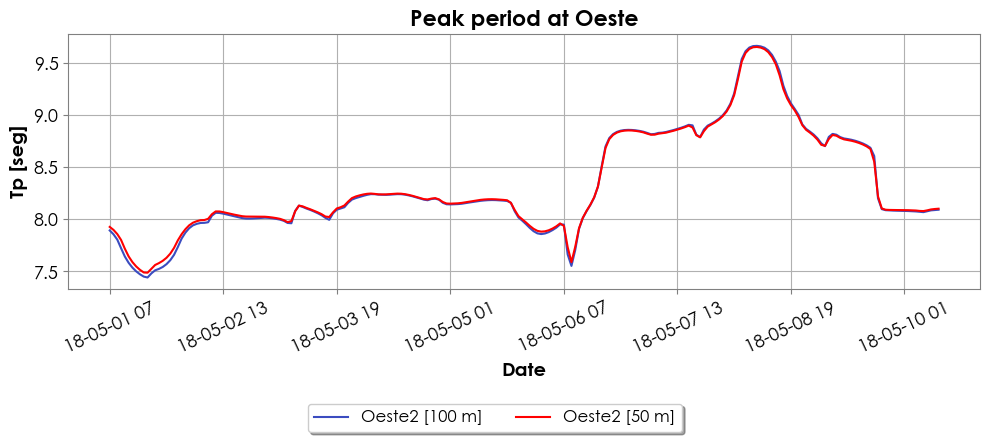

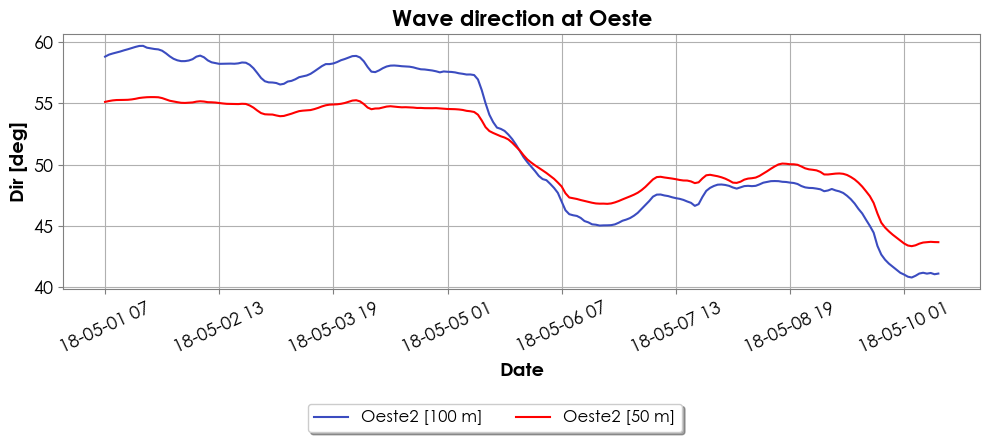

In [73]:
dic_Oeste_100m = read_data_file_TPAR(frontera='Oeste', paths=paths_100m, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
dic_Oeste_50m = read_data_file_TPAR(frontera='Oeste', paths=paths_50m, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)

fig_tepar(dic=dic_Oeste_100m, frontera='Oeste', variable='Hs', label_dic1='100 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Oeste_50m, label_dic2= '50 m')

fig_tepar(dic=dic_Oeste_100m, frontera='Oeste', variable='Tp', label_dic1='100 m', coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Oeste_50m, label_dic2= '50 m')

fig_tepar(dic=dic_Oeste_100m, frontera='Oeste', variable='Dir', label_dic1='100 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Oeste_50m, label_dic2= '50 m')

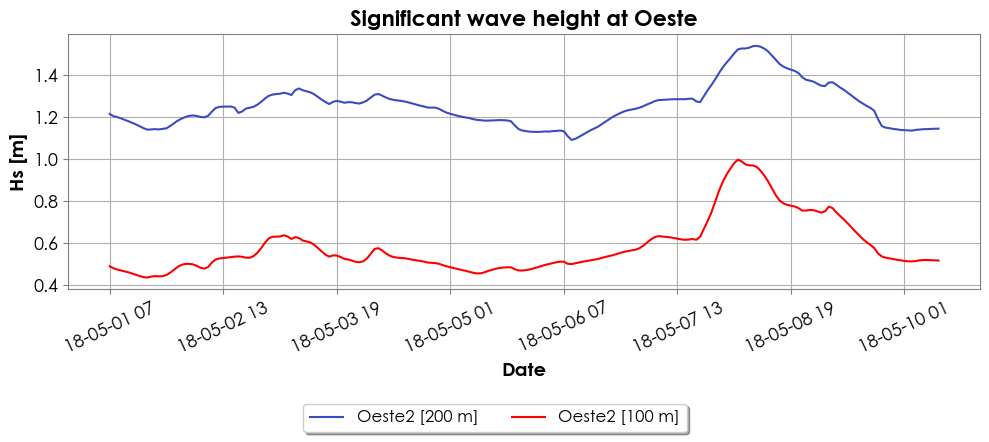

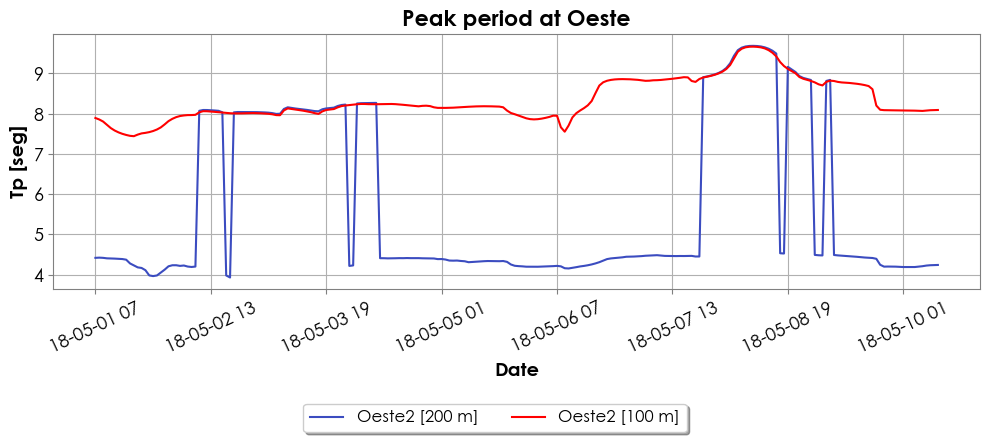

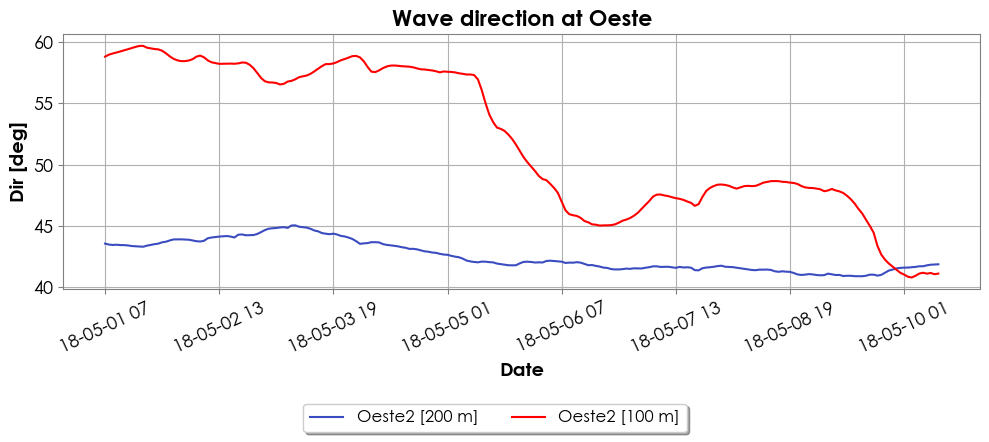

In [67]:
dic_Oeste = read_data_file_TPAR(frontera='Oeste', paths=paths, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
dic_Oeste_100m = read_data_file_TPAR(frontera='Oeste', paths=paths_100m, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)

fig_tepar(dic=dic_Oeste, frontera='Oeste', variable='Hs', label_dic1='200 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Oeste_100m, label_dic2= '100 m')

fig_tepar(dic=dic_Oeste, frontera='Oeste', variable='Tp', label_dic1='200 m', coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Oeste_100m, label_dic2= '100 m')

fig_tepar(dic=dic_Oeste, frontera='Oeste', variable='Dir', label_dic1='200 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Oeste_100m, label_dic2= '100 m')

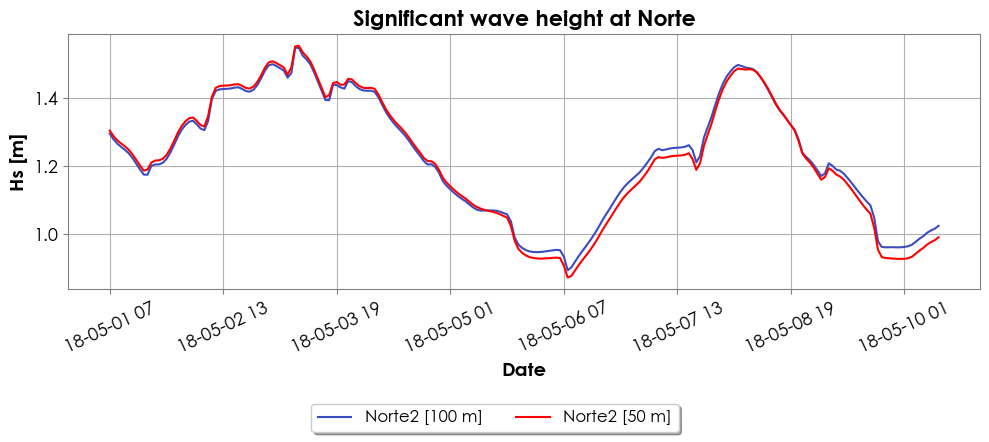

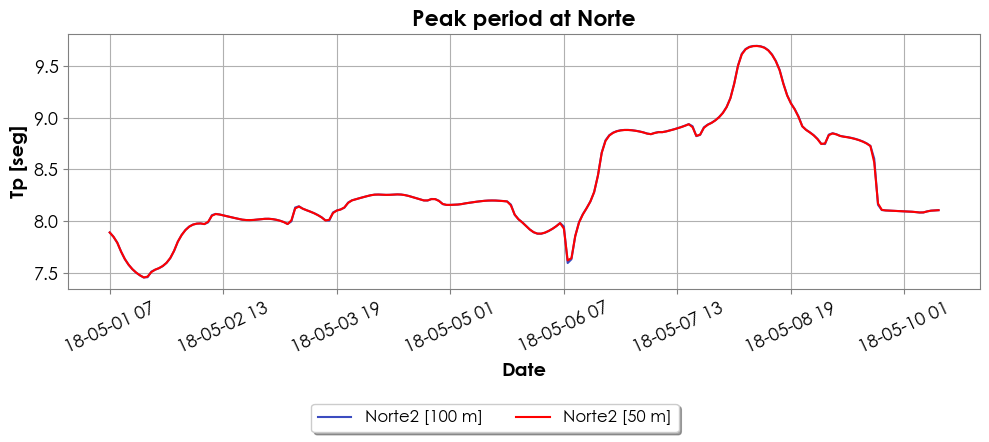

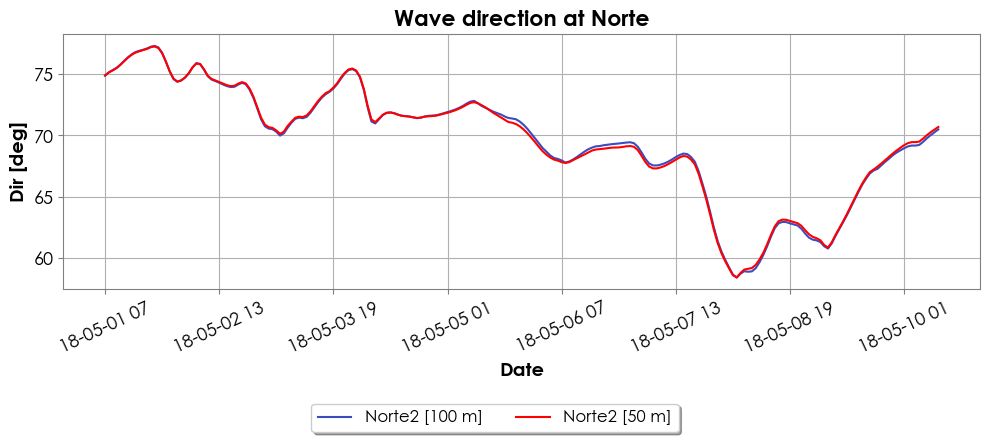

In [74]:
dic_Norte_100m = read_data_file_TPAR(frontera='Norte', paths=paths_100m, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
dic_Norte_50m = read_data_file_TPAR(frontera='Norte', paths=paths_50m, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)

fig_tepar(dic=dic_Norte_100m, frontera='Norte', variable='Hs', label_dic1='100 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Norte_50m, label_dic2= '50 m')

fig_tepar(dic=dic_Norte_100m, frontera='Norte', variable='Tp', label_dic1='100 m', coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Norte_50m, label_dic2= '50 m')

fig_tepar(dic=dic_Norte_100m, frontera='Norte', variable='Dir', label_dic1='100 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Norte_50m, label_dic2= '50 m')

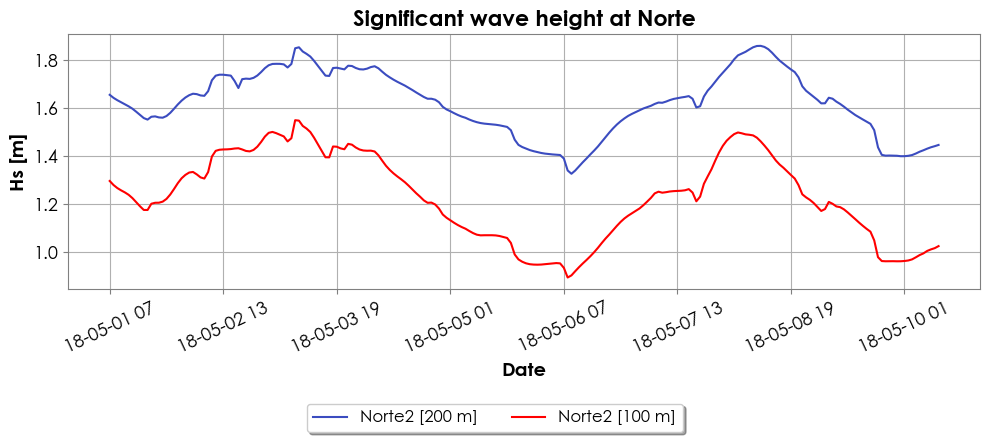

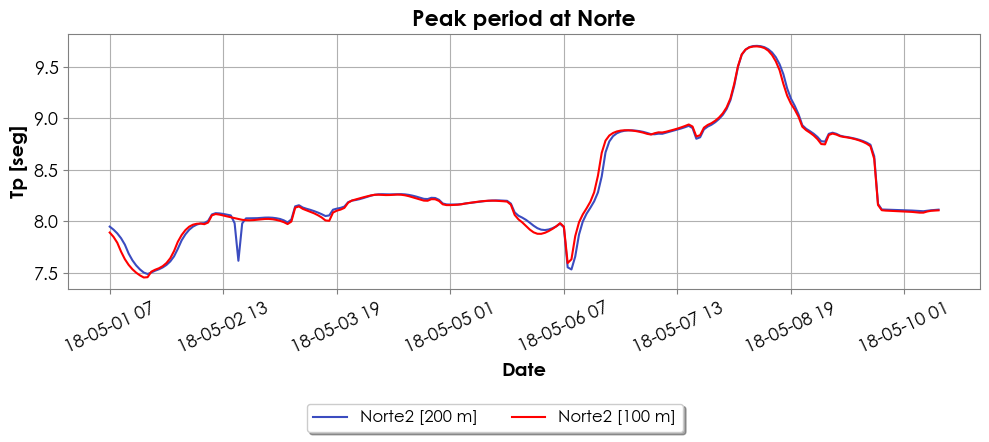

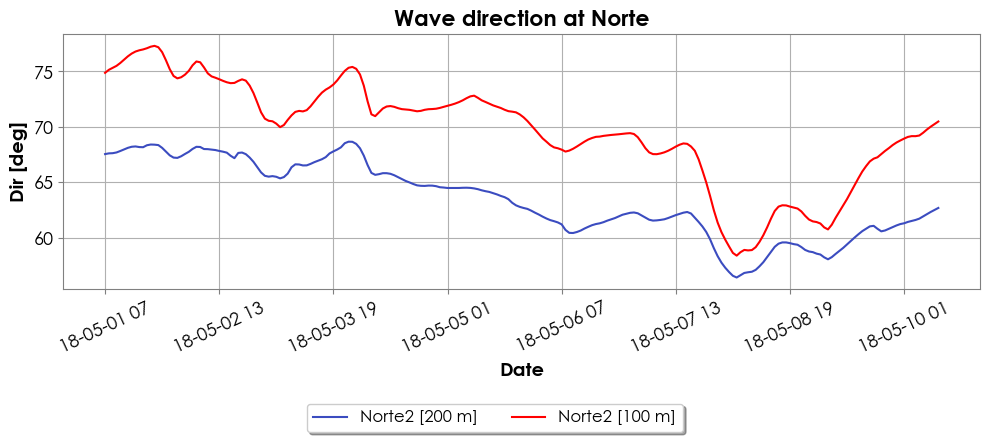

In [68]:
dic_Norte = read_data_file_TPAR(frontera='Norte', paths=paths, 
                                   date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
dic_Norte_100m = read_data_file_TPAR(frontera='Norte', paths=paths_100m, 
                                   date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)

fig_tepar(dic=dic_Norte, frontera='Norte', variable='Hs', label_dic1='200 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Norte_100m, label_dic2= '100 m')

fig_tepar(dic=dic_Norte, frontera='Norte', variable='Tp', label_dic1='200 m', coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Norte_100m, label_dic2= '100 m')

fig_tepar(dic=dic_Norte, frontera='Norte', variable='Dir', label_dic1='200 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Norte_100m, label_dic2= '100 m')

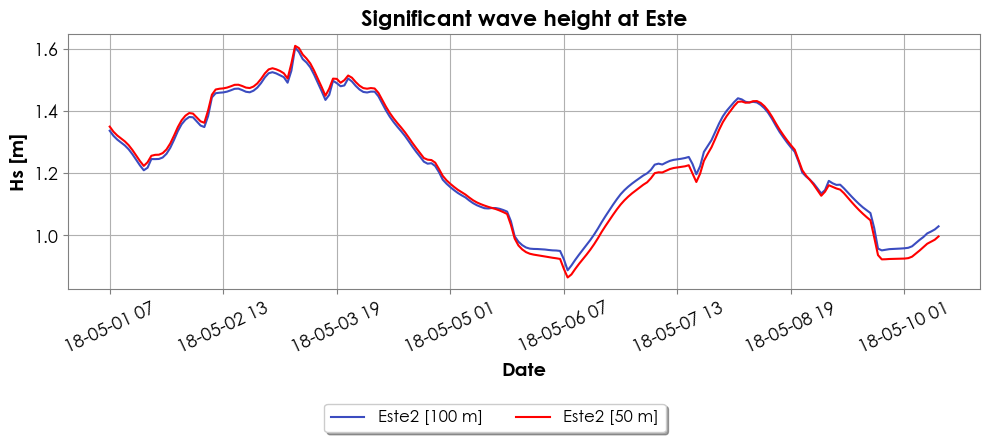

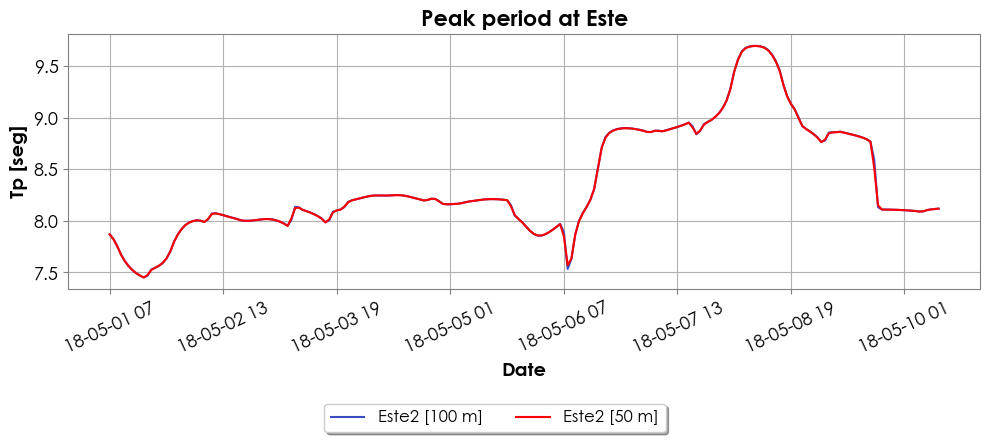

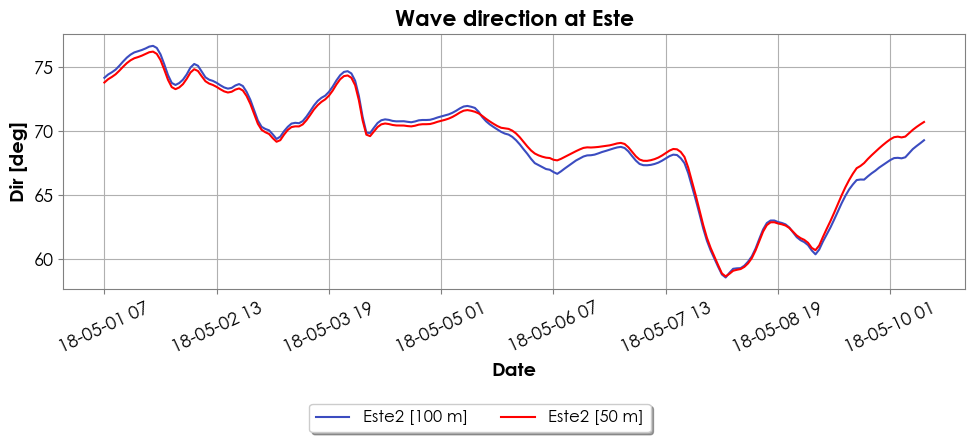

In [75]:
dic_Este_100m = read_data_file_TPAR(frontera='Este', paths=paths_100m, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
dic_Este_50m = read_data_file_TPAR(frontera='Este', paths=paths_50m, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)

fig_tepar(dic=dic_Este_100m, frontera='Este', variable='Hs', label_dic1='100 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Este_50m, label_dic2= '50 m')

fig_tepar(dic=dic_Este_100m, frontera='Este', variable='Tp', label_dic1='100 m', coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Este_50m, label_dic2= '50 m')

fig_tepar(dic=dic_Este_100m, frontera='Este', variable='Dir', label_dic1='100 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Este_50m, label_dic2= '50 m')

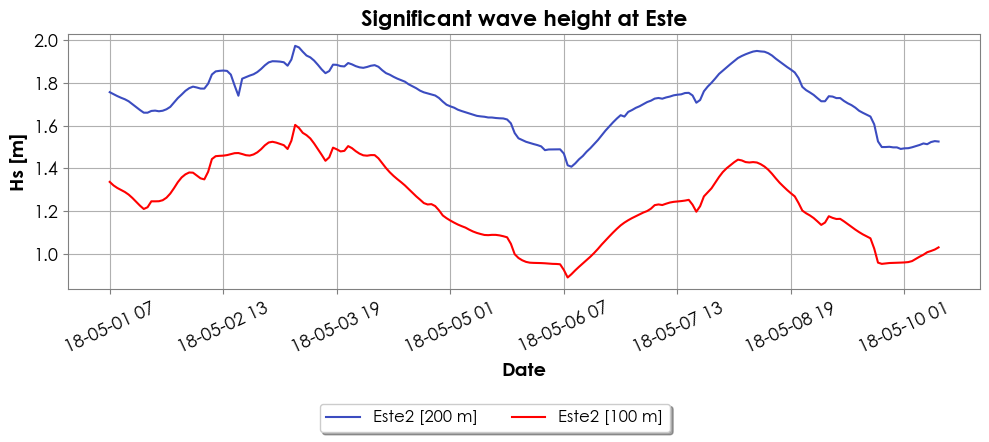

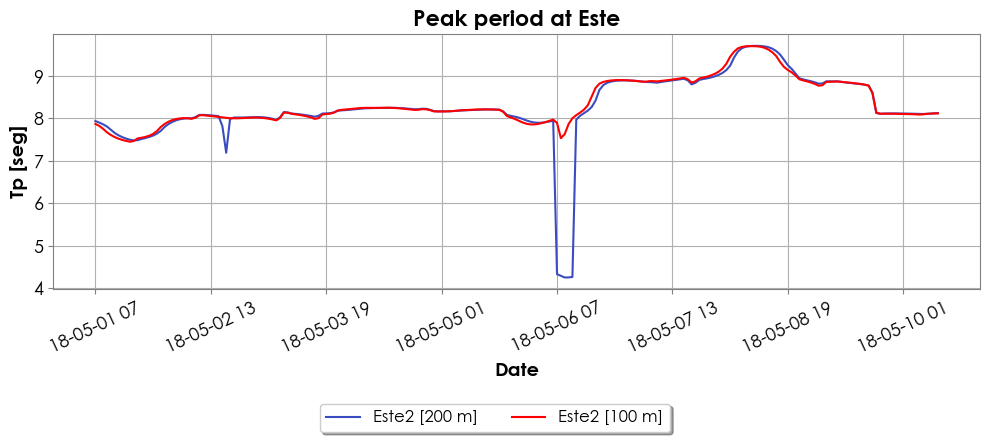

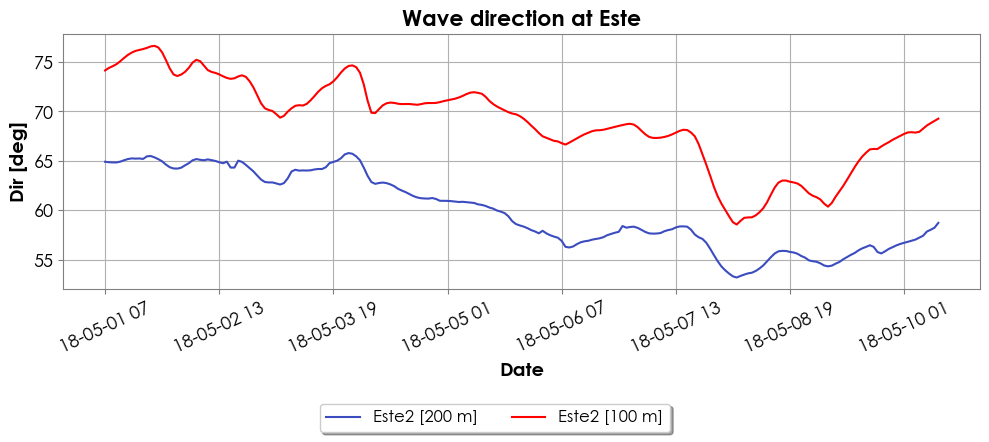

In [69]:
dic_Este = read_data_file_TPAR(frontera='Este', paths=paths, 
                                   date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
dic_Este_100m = read_data_file_TPAR(frontera='Este', paths=paths_100m, 
                                   date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)

fig_tepar(dic=dic_Este, frontera='Este', variable='Hs', label_dic1='200 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Este_100m, label_dic2= '100 m')

fig_tepar(dic=dic_Este, frontera='Este', variable='Tp', label_dic1='200 m', coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Este_100m, label_dic2= '100 m')

fig_tepar(dic=dic_Este, frontera='Este', variable='Dir', label_dic1='200 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Este_100m, label_dic2= '100 m')

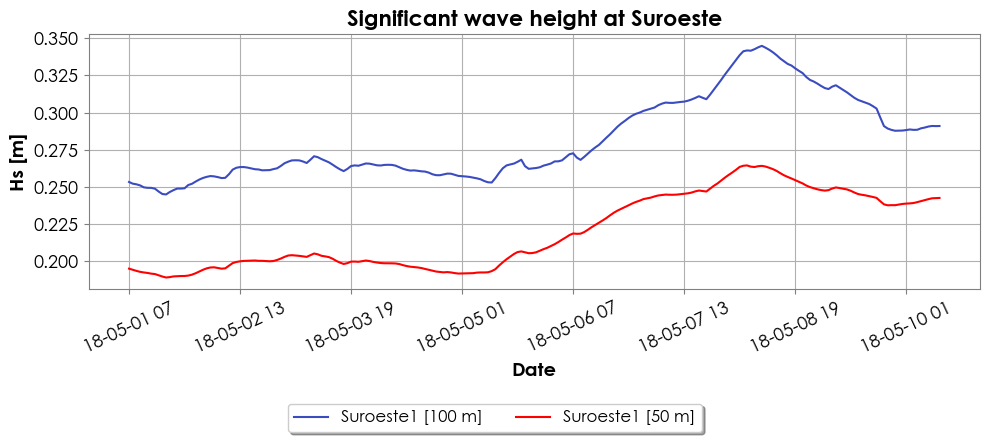

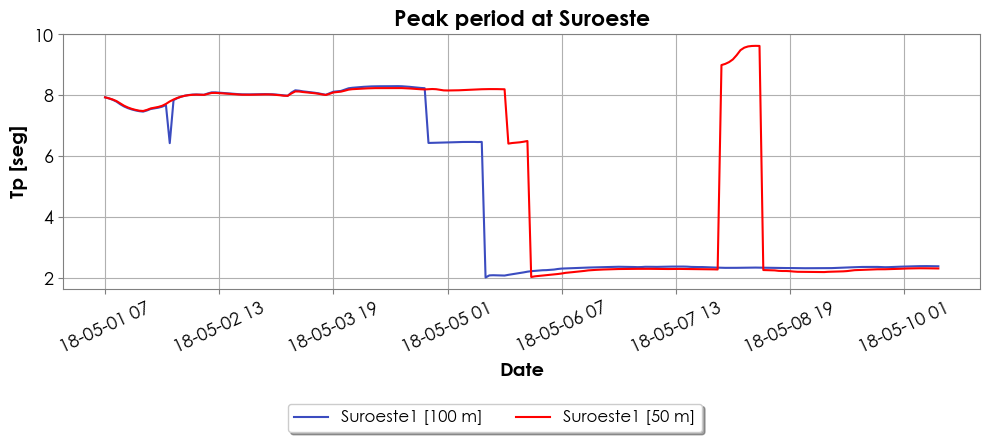

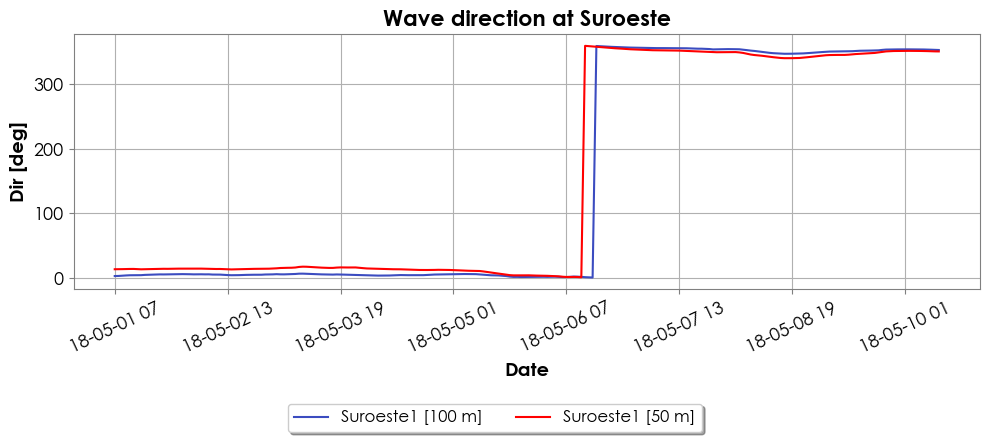

In [77]:
dic_Suroeste_100m = read_data_file_TPAR(frontera='Suroeste', paths=paths_100m, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
dic_Suroeste_50m = read_data_file_TPAR(frontera='Suroeste', paths=paths_50m, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)

fig_tepar(dic=dic_Suroeste_100m, frontera='Suroeste', variable='Hs', label_dic1='100 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Suroeste_50m, label_dic2= '50 m')

fig_tepar(dic=dic_Suroeste_100m, frontera='Suroeste', variable='Tp', label_dic1='100 m', coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Suroeste_50m, label_dic2= '50 m')

fig_tepar(dic=dic_Suroeste_100m, frontera='Suroeste', variable='Dir', label_dic1='100 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Suroeste_50m, label_dic2= '50 m')

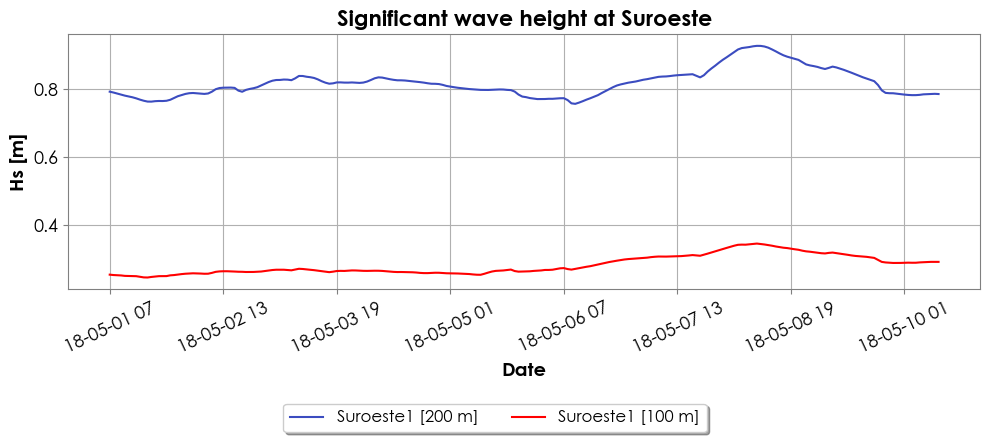

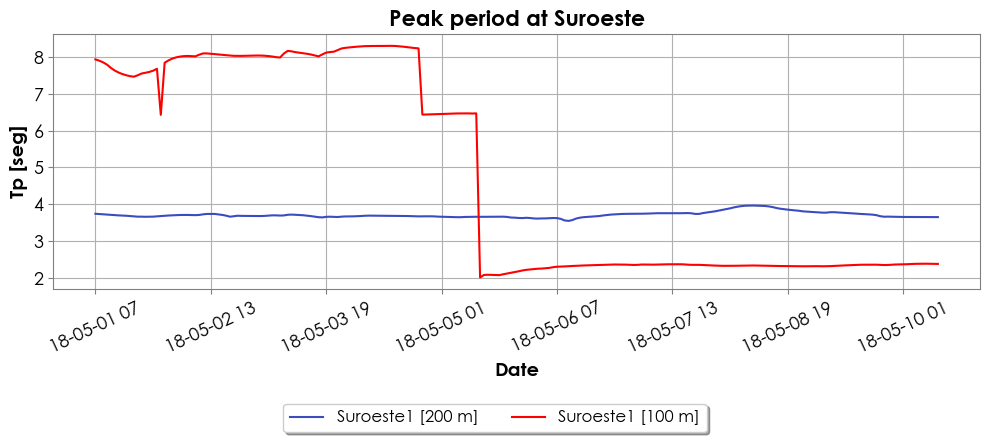

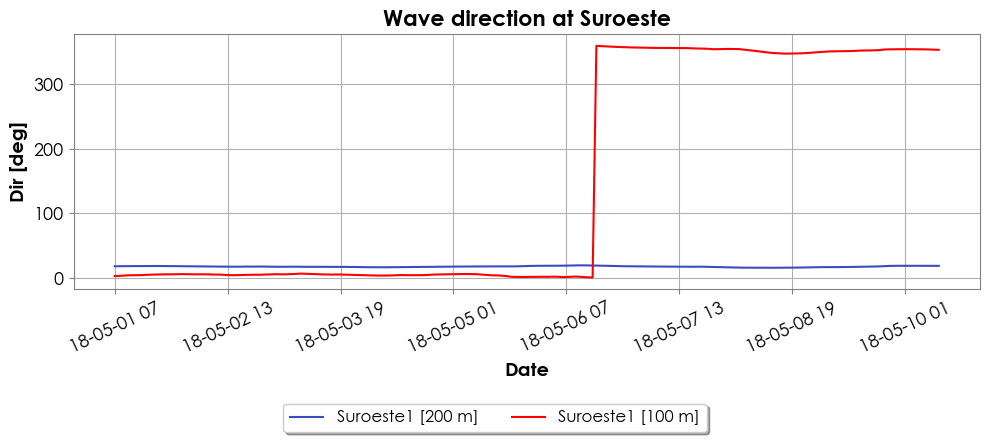

In [70]:
dic_Suroeste = read_data_file_TPAR(frontera='Suroeste', paths=paths, 
                                   date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
dic_Suroeste_100m = read_data_file_TPAR(frontera='Suroeste', paths=paths_100m, 
                                   date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)

fig_tepar(dic=dic_Suroeste, frontera='Suroeste', variable='Hs', label_dic1='200 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Suroeste_100m, label_dic2= '100 m')

fig_tepar(dic=dic_Suroeste, frontera='Suroeste', variable='Tp', label_dic1='200 m', coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Suroeste_100m, label_dic2= '100 m')

fig_tepar(dic=dic_Suroeste, frontera='Suroeste', variable='Dir', label_dic1='200 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Suroeste_100m, label_dic2= '100 m')

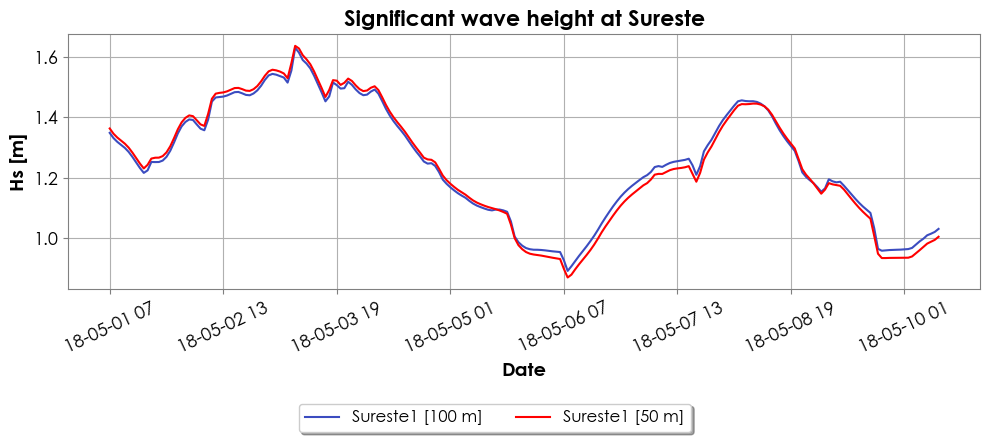

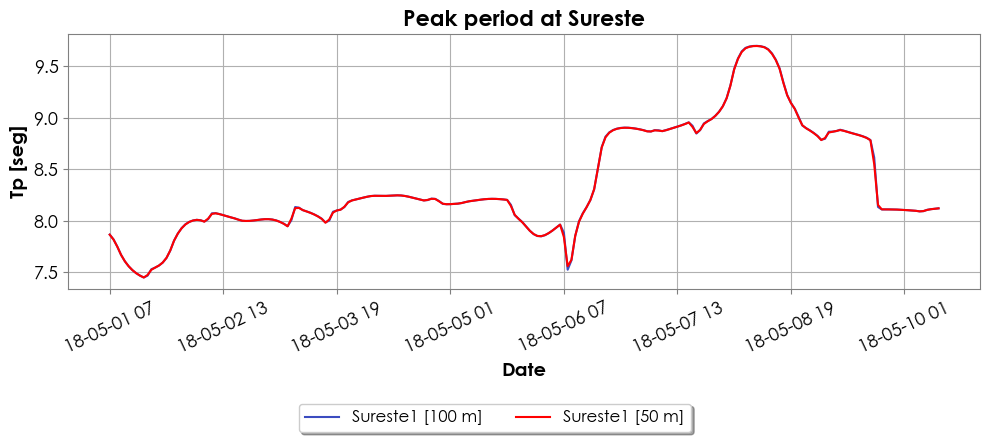

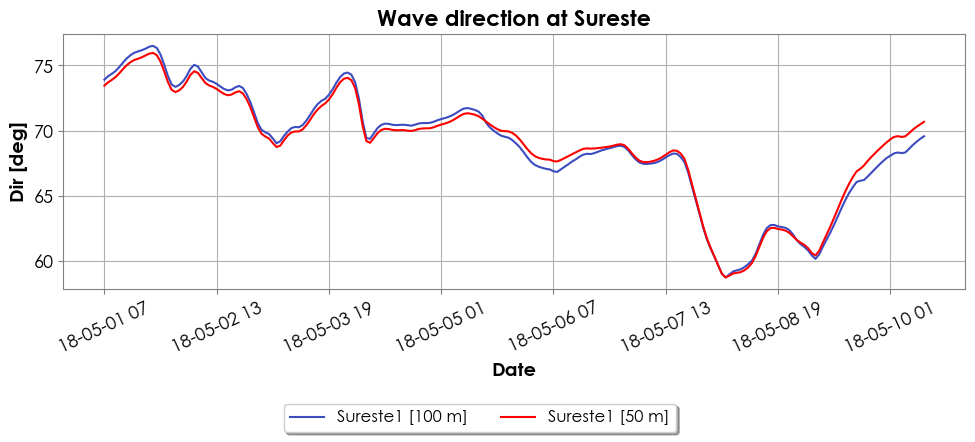

In [78]:
dic_Sureste_100m = read_data_file_TPAR(frontera='Sureste', paths=paths_100m, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
dic_Sureste_50m = read_data_file_TPAR(frontera='Sureste', paths=paths_50m, 
                                date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)

fig_tepar(dic=dic_Sureste_100m, frontera='Sureste', variable='Hs', label_dic1='100 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Sureste_50m, label_dic2= '50 m')

fig_tepar(dic=dic_Sureste_100m, frontera='Sureste', variable='Tp', label_dic1='100 m', coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Sureste_50m, label_dic2= '50 m')

fig_tepar(dic=dic_Sureste_100m, frontera='Sureste', variable='Dir', label_dic1='100 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Sureste_50m, label_dic2= '50 m')

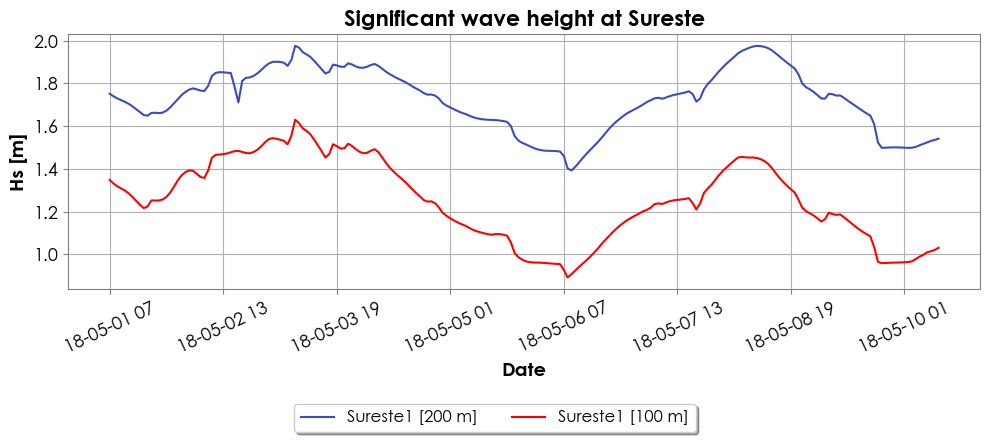

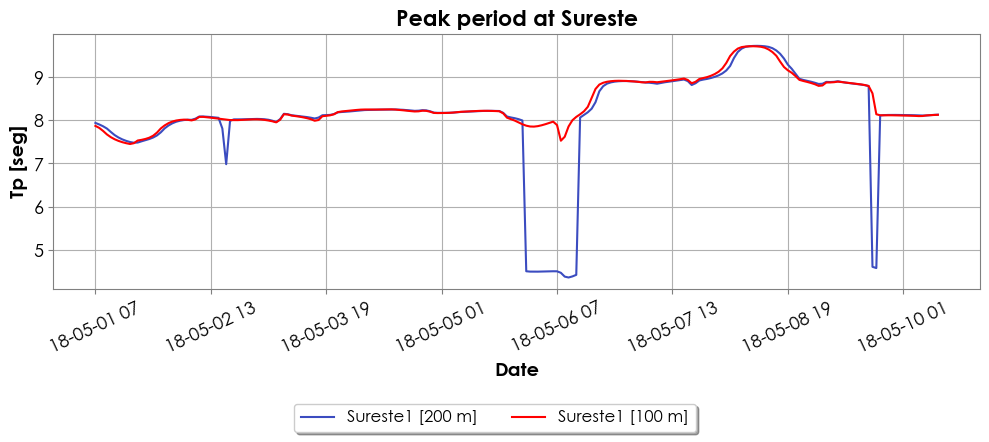

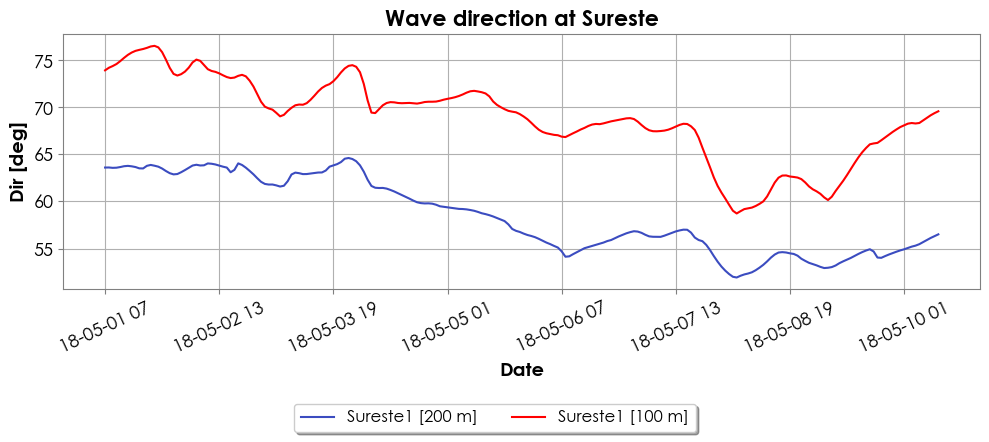

In [71]:
dic_Sureste = read_data_file_TPAR(frontera='Sureste', paths=paths, 
                                   date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)
dic_Sureste_100m = read_data_file_TPAR(frontera='Sureste', paths=paths_100m, 
                                   date_ini=date_ini, date_fin=date_fin, dispersional_direction= 4)

fig_tepar(dic=dic_Sureste, frontera='Sureste', variable='Hs', label_dic1='200 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Sureste_100m, label_dic2= '100 m')

fig_tepar(dic=dic_Sureste, frontera='Sureste', variable='Tp', label_dic1='200 m', coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Sureste_100m, label_dic2= '100 m')

fig_tepar(dic=dic_Sureste, frontera='Sureste', variable='Dir', label_dic1='200 m' ,coef_ticklbs=30, label_rotation=25, 
          date_ini=date_ini, date_fin=date_fin, compare_fig=True, dic2= dic_Sureste_100m, label_dic2= '100 m')